# Исследование игрового рынка

# Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Выявим определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
sns.set(rc={'figure.figsize':(15,8)})

try:
    games = pd.read_csv('datasets/games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')
    
display(games.head(10))
games.info()
original_size = games.shape[0]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Данные выглядят нормально. Нужно навести порядок: привести названия столбцов к одному регистру, заменить типы данных, заполнить пропуски, выявить дубликаты.

# Подготовка данных

In [2]:
games.columns = games.columns.str.lower()
#названия столбцов строчными
games = games.dropna(subset= ['name','genre', 'year_of_release'])
#немного пропусков можно и удалить, ведь их не заполнить никак
games['year_of_release'] = games['year_of_release'].astype('int')
#от года нам нужно лишь число
games['critic_score'] = (games['critic_score']/10).round(1)
#Оценки критиков по 100-бальной шкале, а пользователей по 10. Приведем всё к 10-бальной для удобства
display(games.head())
games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


In [3]:
duplicates = games[games.duplicated(subset= ['name','platform'])]
display(duplicates)

games = games.drop_duplicates(subset= ['name','platform']).reset_index(drop=True)
#повторения названий игр могут быть, если они мультиплатформенные, а вот от повтора название+платформа уже следует избавиться

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,8.3,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,8.2,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,8.3,5.5,E


Таблица "похудела" совсем немного, и в ней нет дубликатов и пропусков названий/жанра/года выпуска.

In [4]:
games['platform'].value_counts()

PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1231
PSP     1193
PS      1190
PC       956
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Названия игровых платформ в норме.

In [5]:
games['genre'].value_counts()

Action          3307
Sports          2305
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1224
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Названия жанров в норме.

In [6]:
games['rating'] = games['rating'].fillna('tbd')
print(games['rating'].value_counts())
display(games.query('rating == "tbd"').sort_values(by='na_sales', ascending=False))

tbd     6676
E       3920
T       2903
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,tbd
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,tbd
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,tbd
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,tbd
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,tbd
...,...,...,...,...,...,...,...,...,...,...,...
10593,Virtual Pro Wrestling,PS,1996,Fighting,0.00,0.00,0.09,0.01,NaN,NaN,tbd
10604,The Idolmaster: Platinum Stars,PS4,2016,Simulation,0.00,0.00,0.10,0.00,NaN,NaN,tbd
10605,Jikkyou Powerful Pro Yakyuu 2013,PSV,2013,Sports,0.00,0.00,0.10,0.00,NaN,NaN,tbd
10611,Tokimeki Memorial: Taisen Pazurudama,PS,1996,Puzzle,0.00,0.00,0.09,0.01,NaN,NaN,tbd


  Рейтинг и оценки у игр отсутствуют бессистемно, но у всех игр с пропущенными оценками отсутствует и рейтинг. Это похоже на ошибку сбора информации или данные отсутствуют изначально. Нужно проверить, почему при сборе информации теряется так много данных. Возможно, дело в алгоритмах, не учитывающих регистр (для рейтинга) или знак разделения целой и доброй части(иногда это запятая). Игры без рейтинга получают "tbd" как "ожидание оценки".

In [7]:
print('user_score')
print(games['user_score'].value_counts())
print('critic_score')
print(games['critic_score'].value_counts())

user_score
tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
2.3       2
1.1       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64
critic_score
7.0    252
7.1    248
7.5    240
8.0    235
7.3    234
      ... 
2.0      3
2.9      3
2.1      1
1.3      1
1.7      1
Name: critic_score, Length: 81, dtype: int64


В оценках пользователей прсутствуют и числа и строки, приведем все в порядок.

In [8]:
games['critic_score'] = games['critic_score'].fillna(0)

games.loc[games['user_score'] == 'tbd', 'user_score'] = 0
games['user_score'] = games['user_score'].fillna(0).astype('float')

display(games.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,tbd
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,8.9,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,5.8,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,8.7,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,tbd


Заполнять рейтинги игр бессмысленно никаими-то значениями, рейтнг присваивается после детального изучения игры, оставим как есть, к тому же, некоторые издатели игр просто не заморачиваются с получением рейтинга. Пропуски в оценках заполнить медианным или средним значением нельзя, их слишком много и все значения в таблице сместятся. Игры без оценок получат 0, что будет означать, что оценки нет. Так же заменены "tbd" на ноль, ведь это "ожидание оценки" для нас не отличается от ее отсутствия.
  

In [9]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
display(games.head())
games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16441 entries, 0 to 16440
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  int32  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     16441 non-null  float64
 9   user_score       16441 non-null  float64
 10  rating           16441 non-null  object 
 11  total_sales      16441 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.4+ MB


Добавим столбец с суммарными продажами игр.

In [10]:
redacted_size = games.shape[0]
print('Таблица уменьшилась на {:}'.format(original_size - redacted_size), 'строки.')

Таблица уменьшилась на 274 строки.


### Итог подготовки данных
Из общего списка были удалены игры без названия и года выпуска, так как их было немного. Удалены немногочисленные дубликаты игр (повтор названия + платформы). Год выпуска в удобном формате. Пропуски заполнены маркерными значениями (0 для оценок и tbd для рейтинга). Названия столбцов приведены к общему виду, добавлен столбец с общим количеством проданных копий игры.

# Анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. 
Важны ли данные за все периоды?

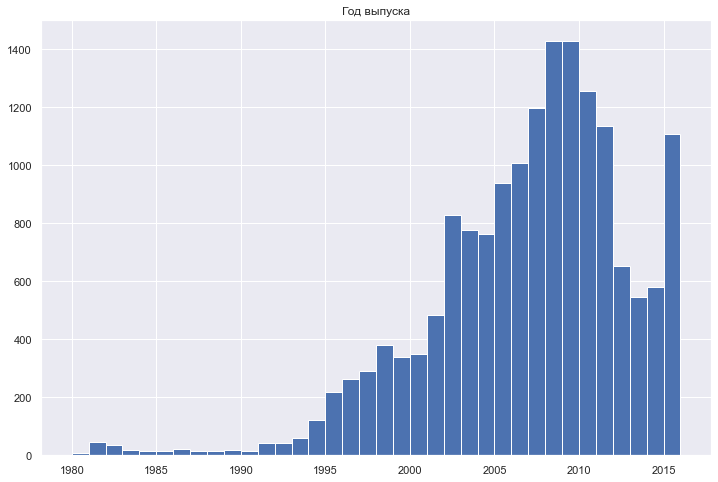

In [11]:
(
    games[['platform', 'year_of_release']]
    .sort_values(by='year_of_release')
    .hist(bins=36, figsize=(12,8))
)
plt.title('Год выпуска')
plt.show();

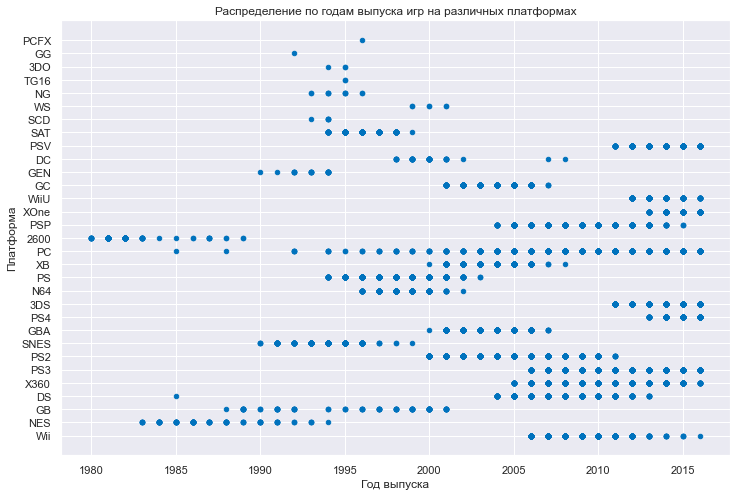

In [12]:
games.plot.scatter(x='year_of_release',
                   y='platform', 
                   figsize=(12,8),
                   color='#0072BD'
                  );
plt.title('Распределение по годам выпуска игр на различных платформах')
plt.xlabel('Год выпуска')
plt.ylabel('Платформа')  
plt.show();

Количество игр быстро росло с 1990 по 2010 годы с резким скачком после 2000. Так же, некоторые игровые платформы перестали выпускаться в период 1995-2000 годы. Исходя из этого, стоит рассматривать игры, вышедшие в нынешнем веке.

### Посмотрим, как менялись продажи по платформам. 
Выбереме платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [13]:
top_platforms = (
    games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
)
top_6_platforms = top_platforms[top_platforms['total_sales'] > 700]
top_6_platforms

,platform,total_sales
16,PS2,1233.56
28,X360,959.99
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58


Лучшие продажи игр для PS2: более миллиарда проданных копий игр, заканчивает топ ее предыдущая версия - PS: чуть больше 700 миллионов. Следующие за ними с большим отрывом, они не войдут в топ.

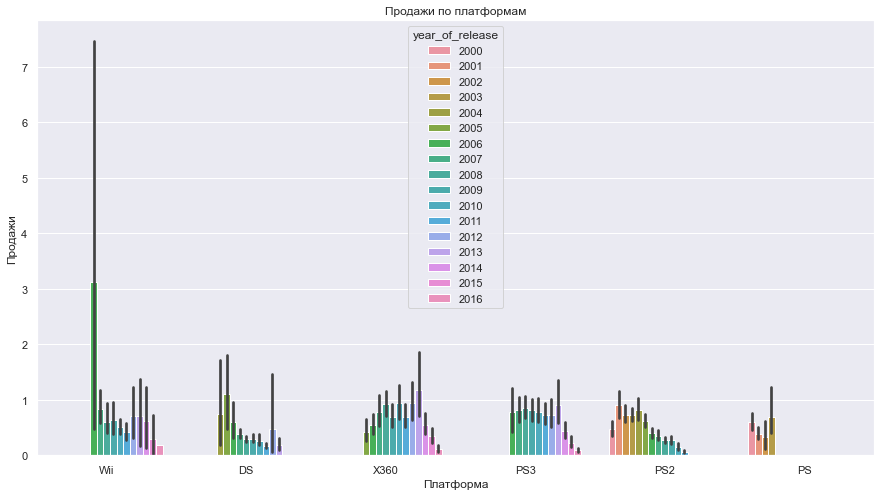

In [14]:
data = games.query('platform in @top_6_platforms.platform')
data = data[data['year_of_release'] >= 2000]

sns.barplot(y='total_sales',
            x='platform', 
            hue='year_of_release',
            data = data)
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')  
plt.show();

Платформа "Wii" показывает небывалые продажи в 2006 году, но из-за этого сложно воспринимать график. Попробуем взять данные после 2006 года:

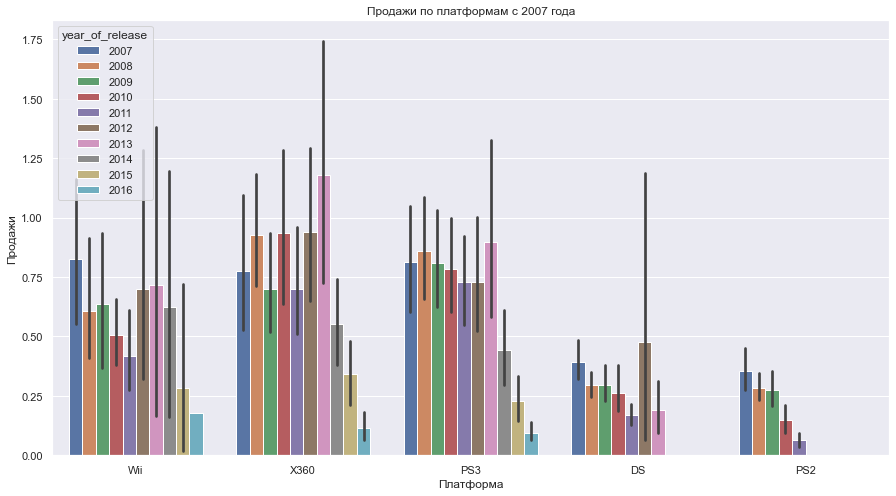

In [15]:
data = data[data['year_of_release'] >= 2007]

sns.barplot(y='total_sales',
            x='platform',
            hue='year_of_release', 
            data = data
           );
plt.title('Продажи по платформам с 2007 года')
plt.xlabel('Платформа')
plt.ylabel('Продажи')  
plt.show();

Все платформы показывают тенденцию к снижению продаж через какое-то время после появления. Выясним через какое и заодно время жизни платформы.

In [16]:
platforms = (
    games[['platform', 'year_of_release']]
    .drop_duplicates()
    .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
    .reset_index()
    .rename(columns={'year_of_release':'lifetime'})
    .sort_values(by='lifetime', ascending=False)
)
display(platforms)

,platform,lifetime
13,PC,26
5,GB,13
11,NES,12
28,X360,12
19,PSP,12
16,PS2,12
26,Wii,11
4,DS,11
17,PS3,11
0,2600,10


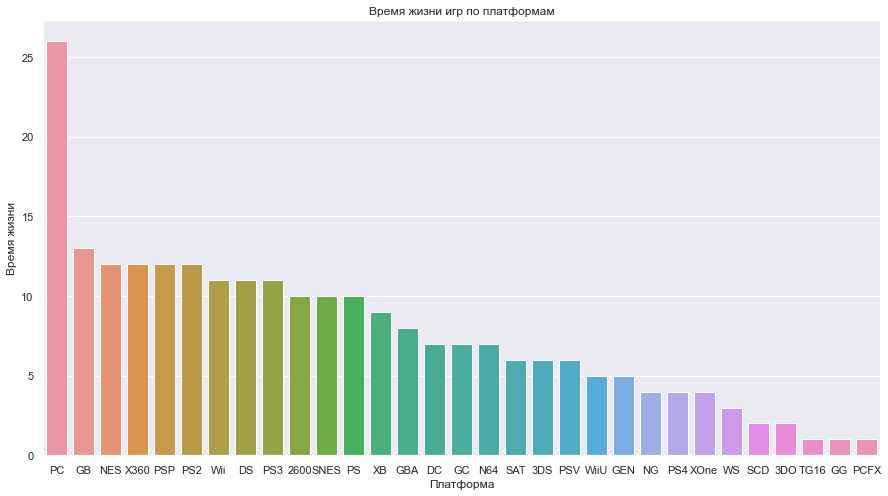

In [17]:
sns.barplot(data = platforms,
            x=platforms.platform,
            y='lifetime'
           )
plt.title('Время жизни игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Время жизни')  
plt.show();

Ожидаемо, компьютер как платформа будет жить чуть ли не вечно, с момента своего появления. Рассмотрим остальные игровые платформы отдельно и выявим среднее время жизни платформы.

In [18]:
platforms.query('platform != "PC"').describe() 

,lifetime
count,30.000000
mean,7.066667
std,3.841097
min,1.000000
25%,4.000000
50%,7.000000
75%,10.750000
max,13.000000


Среднее время жизни платформы- 7 лет. За это время новыие игры становятся более требовательными, как и пользователи.

### Возьмем данные за соответствующий актуальный период.
Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитываем в работе данные за предыдущие годы.

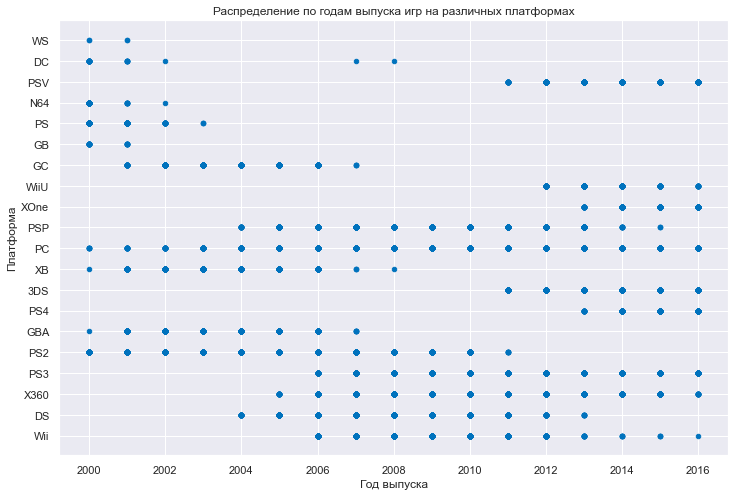

In [19]:
(
    games
    .query('year_of_release >= 2000')
    .plot.scatter(x='year_of_release',
                  y='platform',
                  figsize=(12,8),
                  color='#0072BD'
                 )
)
plt.title('Распределение по годам выпуска игр на различных платформах')
plt.xlabel('Год выпуска')
plt.ylabel('Платформа')  
plt.show();

В 2013 году было много релизов на разные платформы, некоторые актуальные до сих пор платформы появились в этот год (Xbox One, PlayStation 4). Период 2013-2016 выглядит наиболее актуальным.

In [20]:
actual_data = games[games['year_of_release'] >= 2013]

### Какие платформы лидируют по продажам, растут или падают? 
Выберем несколько потенциально прибыльных платформ.

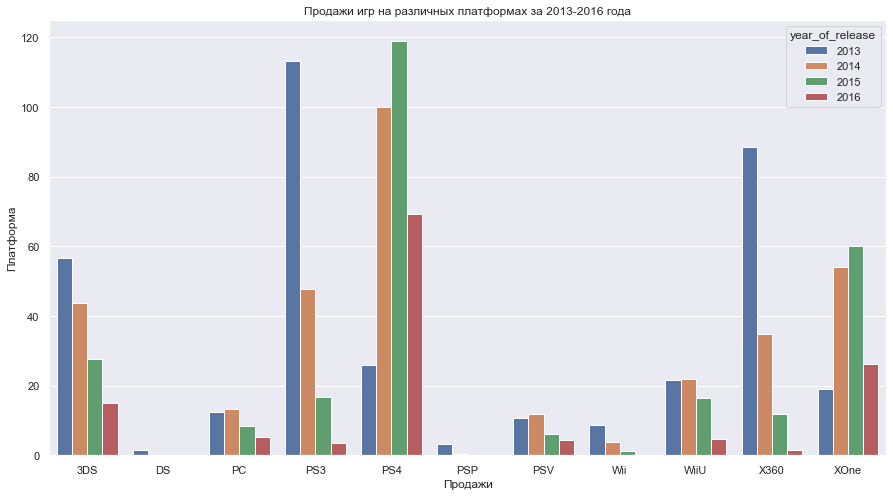

In [21]:
platforms_profitability = (
    actual_data
    .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
    .reset_index()
)

sns.barplot(y='total_sales',
            x='platform',
            hue='year_of_release',
            data = platforms_profitability
           )
plt.title('Продажи игр на различных платформах за 2013-2016 года')
plt.xlabel('Продажи')
plt.ylabel('Платформа')  
plt.show();

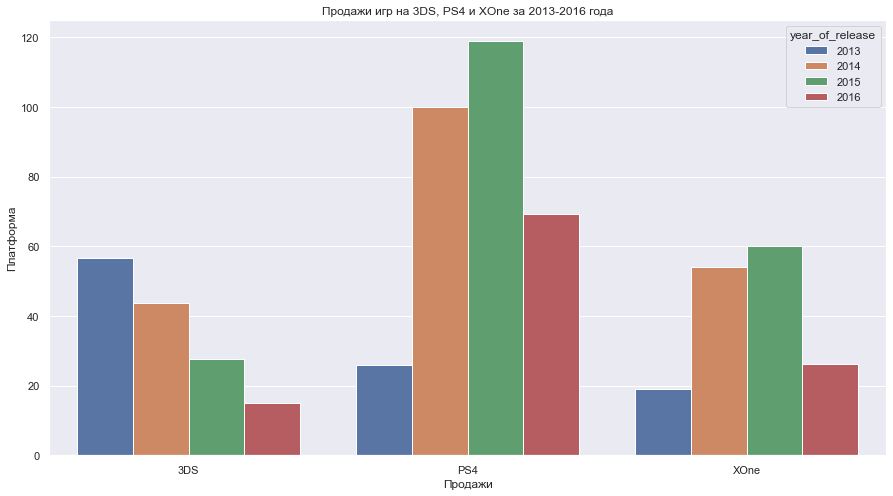

In [22]:
actual_platform_list = ['3DS', 'PS4', 'XOne']

platforms_actual = platforms_profitability[platforms_profitability['platform'].isin(actual_platform_list)]

sns.barplot(y='total_sales',
            x='platform',
            hue='year_of_release',
            data = platforms_actual
           )
plt.title('Продажи игр на 3DS, PS4 и XOne за 2013-2016 года')
plt.xlabel('Продажи')
plt.ylabel('Платформа')  
plt.show();

Все платформы показывают тенденцию к снижению продаж. Некоторые платформы более не актуальны (DS, PSP, Wii), так как не имеют продаж за последние годы. PS3, X360, WiiU, PSV, PC имеют очень низкие продажи в целом или за 2016 год. Наиболее потенциально прибыльными выглядят платформы 3DS, PS4 и XOne. Хоть все из них показывают отрицательную тенденцию, у PS4 и XOne были фазы роста до этого года.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

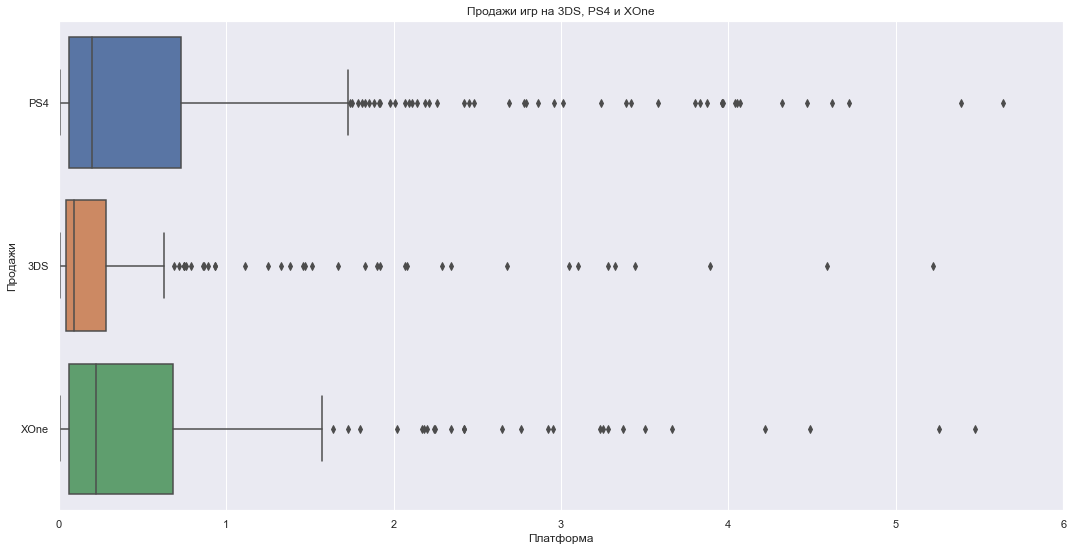

In [23]:
plt.figure(figsize= (18, 9))
sns.boxplot(data = actual_data.query('platform in @actual_platform_list'),
            x='total_sales',
            y='platform'
           )
plt.title('Продажи игр на 3DS, PS4 и XOne')
plt.xlabel('Платформа')
plt.ylabel('Продажи')  
plt.xlim(0, 6)
plt.show();

Выбросы показывают наиболее удачные игры.
PS4 показывает лучшие средние продажи, больше суммы остальных участников, хоть и с большим разбросом вниз. XOne и 3DS показывают схожие между собой результаты.

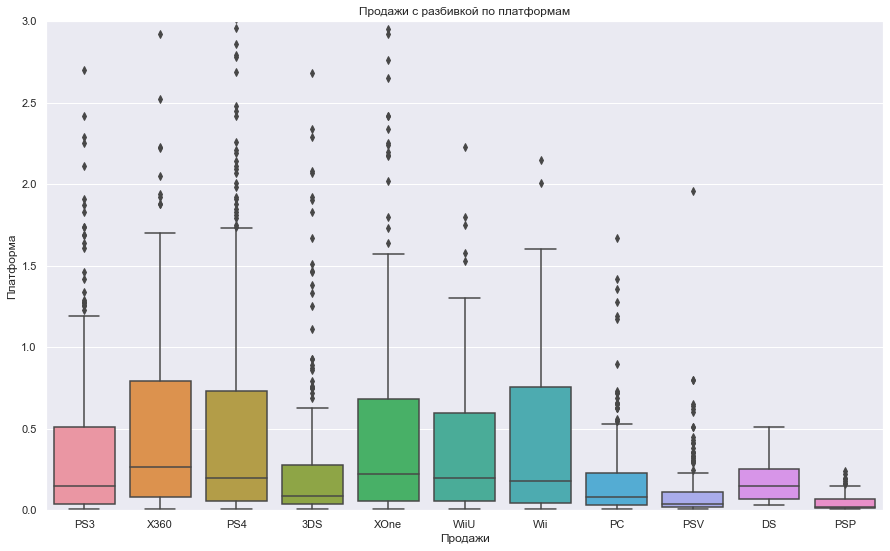

In [24]:
plt.figure(figsize= (15, 9))
sns.boxplot(x = actual_data['platform'], y = actual_data['total_sales'])
plt.title('Продажи с разбивкой по платформам')
plt.xlabel('Продажи')
plt.ylabel('Платформа') 
plt.ylim(0, 3)
plt.show();

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

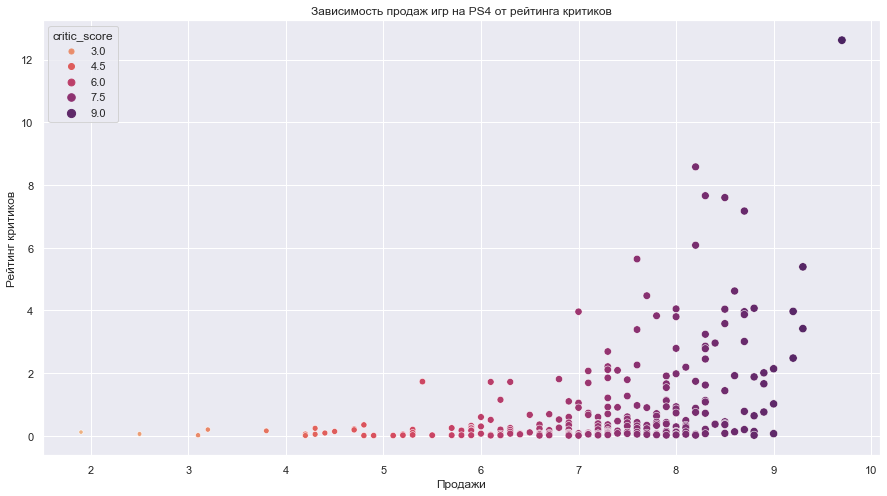

Корелляция: 0.4058948014583663


In [25]:
games_PS4 = games[(games['platform'] == 'PS4') &
                  (games['year_of_release'] >= 2013) &
                  (games['critic_score'] > 0) & 
                  (games['user_score'] > 0)]
#посмотрим на самую популярную платформу PS4, только по актуальным годам и только с оценками

sns.scatterplot(
    data=games_PS4, 
    x='critic_score', 
    y='total_sales', 
    hue = 'critic_score', 
    size='critic_score', 
    palette='flare', 
)
plt.title('Зависимость продаж игр на PS4 от рейтинга критиков')
plt.xlabel('Продажи')
plt.ylabel('Рейтинг критиков') 
plt.show();

print('Корелляция: {:}'.format(games_PS4['critic_score'].corr(games_PS4['total_sales'])))

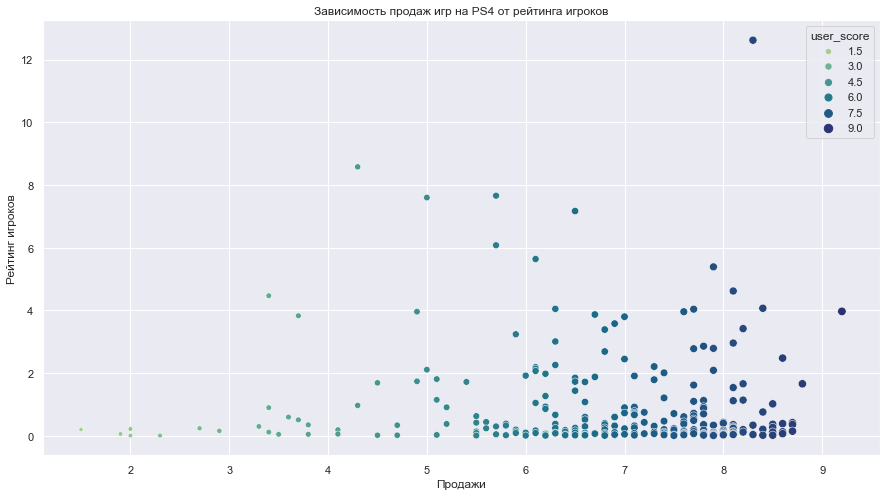

Корелляция: -0.0336249759652888


In [26]:
sns.scatterplot(
    data=games_PS4, 
    x='user_score', 
    y='total_sales', 
    hue = 'user_score', 
    size='user_score', 
    palette='crest', 
)
plt.title('Зависимость продаж игр на PS4 от рейтинга игроков')
plt.xlabel('Продажи')
plt.ylabel('Рейтинг игроков') 
plt.show();

print('Корелляция: {:}'.format(games_PS4['user_score'].corr(games_PS4['total_sales'])))

Даже игры с небольшими продажами получают высокий рейтинг. 
Мнение критиков соотносится с количеством продаж довольно сильно. Чем больше продаж у игры, тем вероятнее она получит высокую оценку у критиков.
С оценками пользователей всё не так однозначно. В общем, продажи игры не влияют на ее оценку игроками.

### Соотнесем выводы с продажами игр на других платформах.

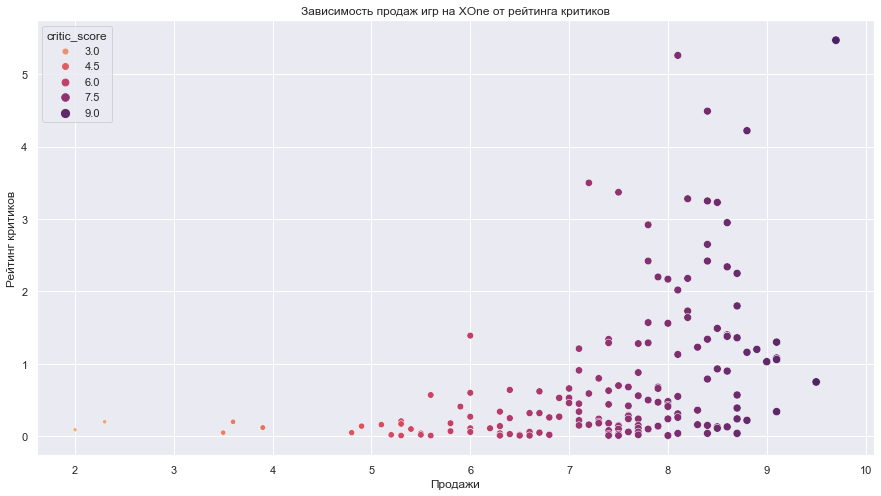

Корелляция: 0.41042203561296386


In [27]:
games_XOne = games[(games['platform'] == 'XOne') &
                  (games['year_of_release'] >= 2013) &
                  (games['critic_score'] > 0) & 
                  (games['user_score'] > 0)]

sns.scatterplot(
    data=games_XOne, 
    x='critic_score', 
    y='total_sales', 
    hue = 'critic_score', 
    size='critic_score', 
    palette='flare', 
)
plt.title('Зависимость продаж игр на XOne от рейтинга критиков')
plt.xlabel('Продажи')
plt.ylabel('Рейтинг критиков') 
plt.show();

print('Корелляция: {:}'.format(games_XOne['critic_score'].corr(games_XOne['total_sales'])))

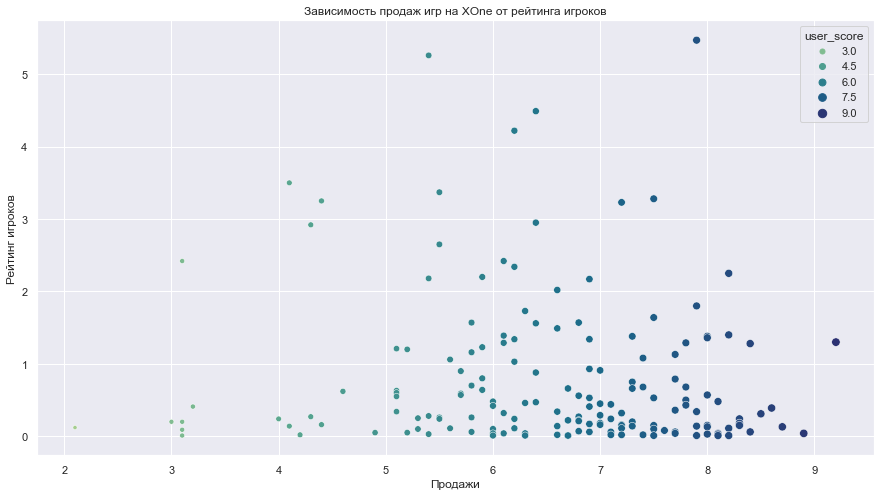

Корелляция: -0.09400318326920859


In [28]:
sns.scatterplot(
    data=games_XOne, 
    x='user_score', 
    y='total_sales', 
    hue = 'user_score', 
    size='user_score', 
    palette='crest', 
)
plt.title('Зависимость продаж игр на XOne от рейтинга игроков')
plt.xlabel('Продажи')
plt.ylabel('Рейтинг игроков') 
plt.show()

print('Корелляция: {:}'.format(games_XOne['user_score'].corr(games_XOne['total_sales'])))

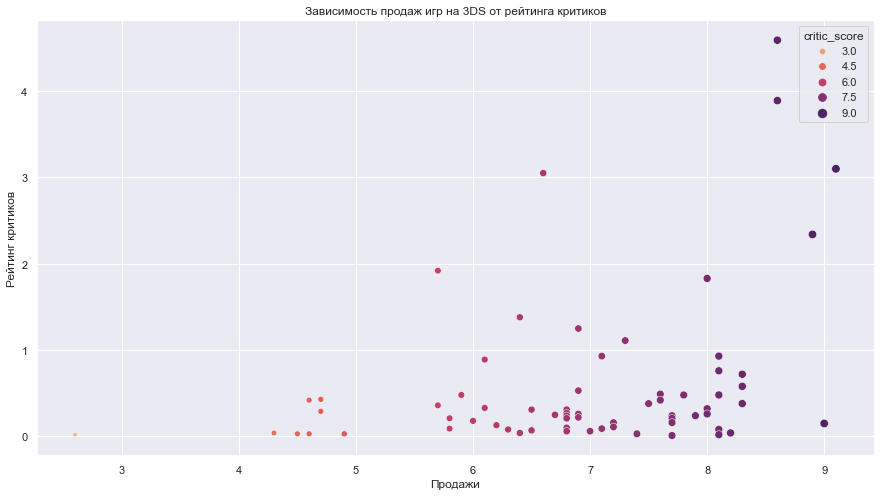

Корелляция: 0.3392349287853145


In [29]:
games_3DS = games[(games['platform'] == '3DS') &
                  (games['year_of_release'] >= 2013) &
                  (games['critic_score'] > 0) & 
                  (games['user_score'] > 0)]

sns.scatterplot(
    data=games_3DS, 
    x='critic_score', 
    y='total_sales', 
    hue = 'critic_score', 
    size='critic_score', 
    palette='flare', 
)
plt.title('Зависимость продаж игр на 3DS от рейтинга критиков')
plt.xlabel('Продажи')
plt.ylabel('Рейтинг критиков') 
plt.show()

print('Корелляция: {:}'.format(games_3DS['critic_score'].corr(games_3DS['total_sales'])))

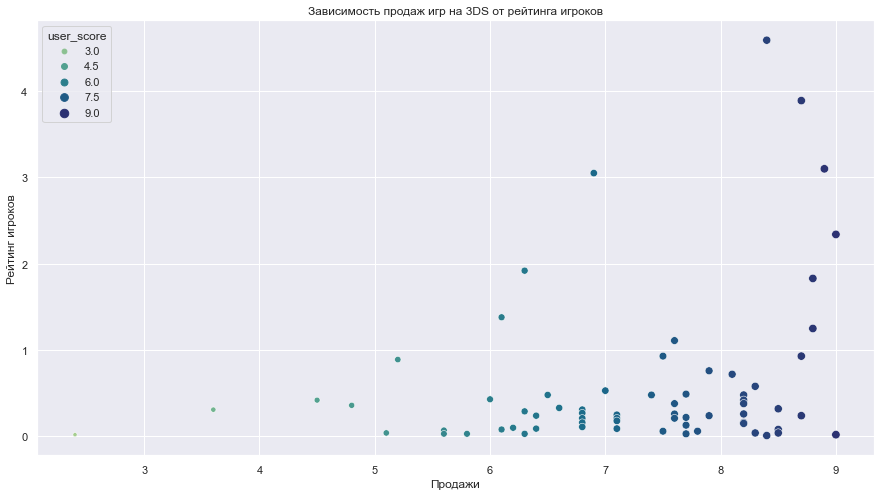

Корелляция: 0.2729904366942444


In [30]:
sns.scatterplot(
    data=games_3DS, 
    x='user_score', 
    y='total_sales', 
    hue = 'user_score', 
    size='user_score', 
    palette='crest', 
)
plt.title('Зависимость продаж игр на 3DS от рейтинга игроков')
plt.xlabel('Продажи')
plt.ylabel('Рейтинг игроков') 
plt.show();

print('Корелляция: {:}'.format(games_3DS['user_score'].corr(games_3DS['total_sales'])))

Ситуация с Xbox One похожая, а вот пользователи Nintendo чаще согласны с мнением критиков, их оценоычные паттерны очень похожи на графиках.

### Посмотрим на общее распределение игр по жанрам.
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [31]:
genre_table = (
    actual_data
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
)

display(genre_table)

,genre,total_sales
8,Shooter,0.450
10,Sports,0.240
4,Platform,0.225
7,Role-Playing,0.125
2,Fighting,0.125
6,Racing,0.120
0,Action,0.110
9,Simulation,0.100
3,Misc,0.100
11,Strategy,0.080


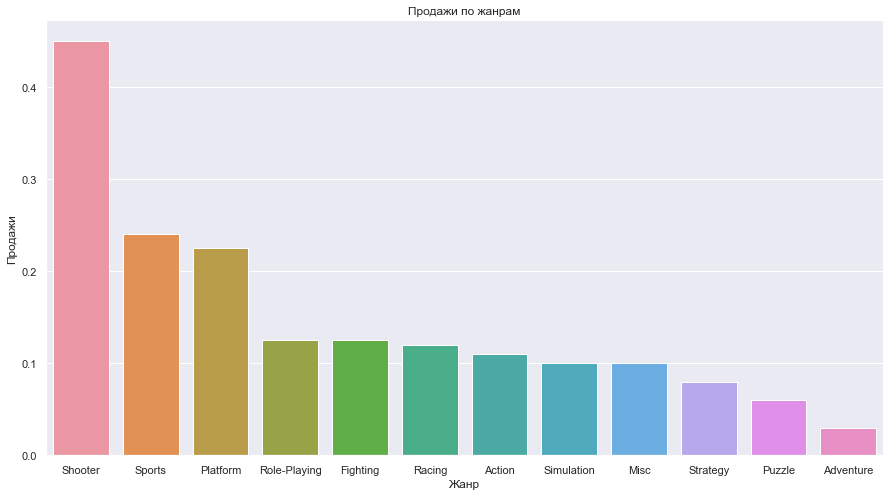

In [32]:
sns.barplot(y='total_sales',
            x='genre', 
            data = genre_table
           )
plt.title('Продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи') 
plt.show();

Сравним медианные продажи по жанрам- так можно исключить влияние выбросов.
Среди жанров есть явные фавориты: Shooter, Action, Platform.
Хуже всего дела идут у игр в жанре Adventure.
Люди любят активные игры, а более спокойные и вдумчивые игры продаются хуже.

#  Составим портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):

### Самые популярные платформы (топ-5). 
Опишите различия в долях продаж.

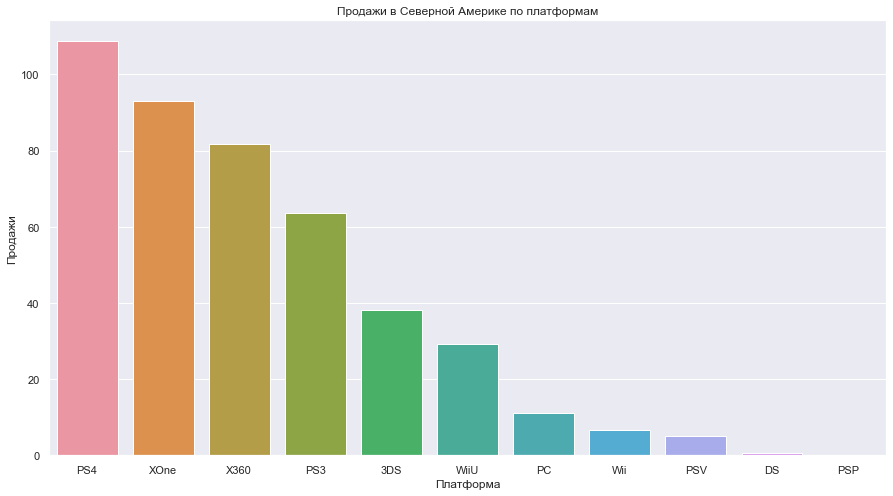

In [33]:
na_platforms_top = (
    actual_data
    .pivot_table(index=['platform'], values='na_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='na_sales', ascending=False)
)

sns.barplot(y='na_sales',
            x='platform',
            data = na_platforms_top
           )
plt.title('Продажи в Северной Америке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи') 
plt.show();

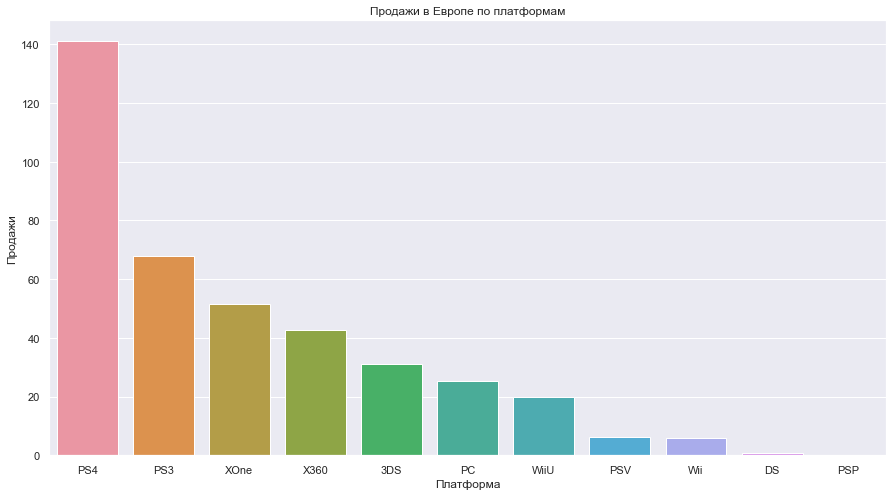

In [34]:
eu_platforms_top = (
    actual_data
    .pivot_table(index=['platform'], values='eu_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='eu_sales', ascending=False)
)

sns.barplot(y='eu_sales', 
            x='platform', 
            data = eu_platforms_top
           )
plt.title('Продажи в Европе по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи') 
plt.show();

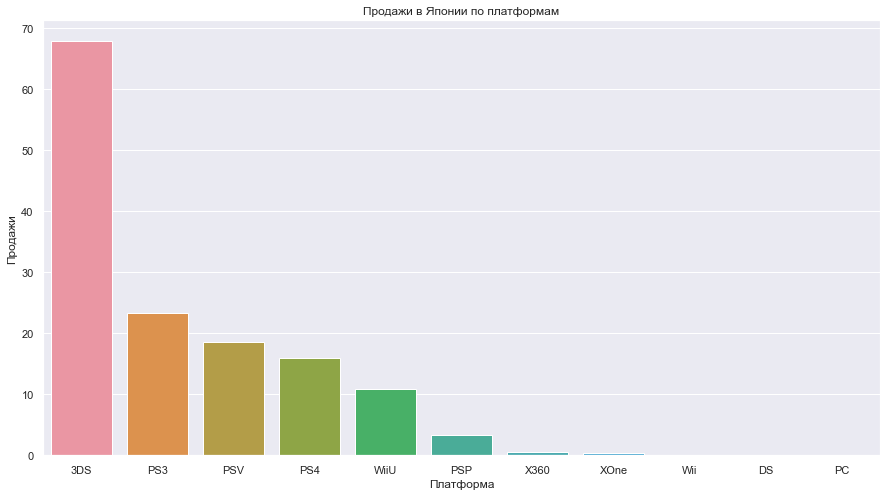

In [35]:
jp_platforms_top = (
    actual_data
    .pivot_table(index=['platform'], values='jp_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='jp_sales', ascending=False)
)

sns.barplot(y='jp_sales', 
            x='platform',
            data = jp_platforms_top
           )
plt.title('Продажи в Японии по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи') 
plt.show();

Если не брать в расчёт и без того популярную консоль PS4, то можно увидеть, что в странах северной Америки большую популяроность имеет прямой конкурент- Xbox One. Это можно объяснить американскими корнями приставки. А в Японии со своей культурой игр и огромной любовью к Nintendo в топе приставка Nintendo 3DS. А что занятно- третья версия PlayStation популярнее четвертой (наверное, это их любовь к старым играм). В Европе ситуация простая: есть PS4 и все остальные. Популярность объяснима: никакая из приставок не имеет локального происхождения, самой популярной будет та, которая раньше вышла и имеет больше игр (особенно эксклюзивных).

### Самые популярные жанры (топ-5). 

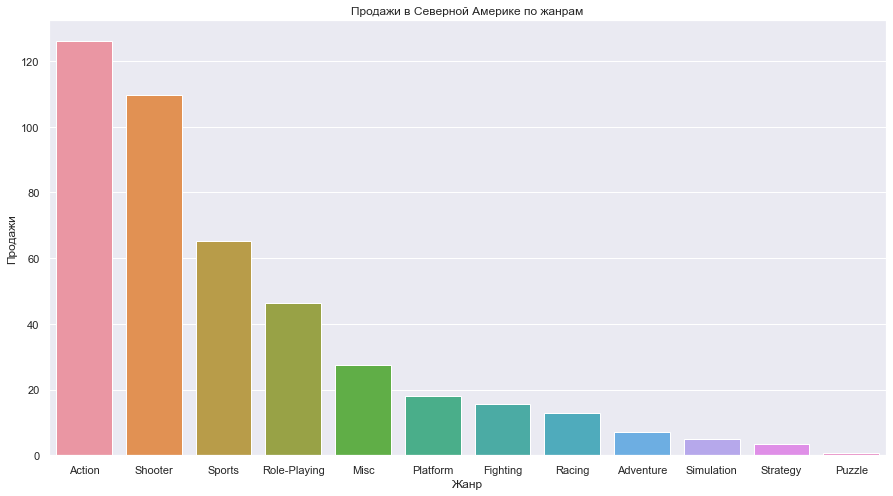

In [36]:
na_genres_top = (
    actual_data
    .pivot_table(index=['genre'], values='na_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='na_sales', ascending=False)
)

sns.barplot(y='na_sales', 
            x='genre',
            data = na_genres_top
           )
plt.title('Продажи в Северной Америке по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи') 
plt.show();

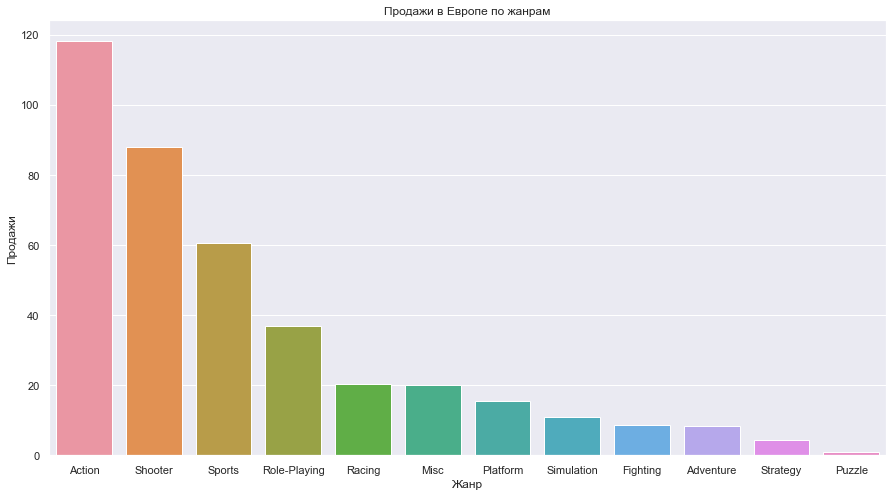

In [37]:
eu_genres_top = (
    actual_data
    .pivot_table(index=['genre'], values='eu_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='eu_sales', ascending=False)
)

sns.barplot(y='eu_sales', 
            x='genre',
            data = eu_genres_top
           )
plt.title('Продажи в Европе по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи') 
plt.show();

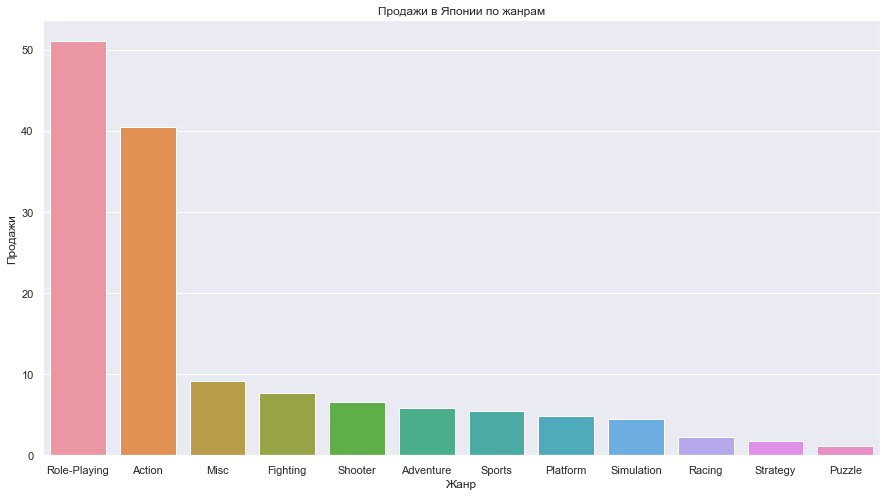

In [38]:
jp_genres_top = (
    actual_data
    .pivot_table(index=['genre'], values='jp_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='jp_sales', ascending=False)
)

sns.barplot(y='jp_sales',
            x='genre', 
            data = jp_genres_top
           )
plt.title('Продажи в Японии по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи') 
plt.show();

С жанрами в Европе и северной Америке ситуация схожая: любовь к активным играм ярко выражена (в Америке больше любят пострелять, новость, конечно). Япония, как обычно, выделяется на общем фоне. Ролевые игры в почете, чуть позади экшн, для остальных жанров времени не остается. Неудивительно, ведь Nintendo славится как раз всякого рода RPG-играми.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

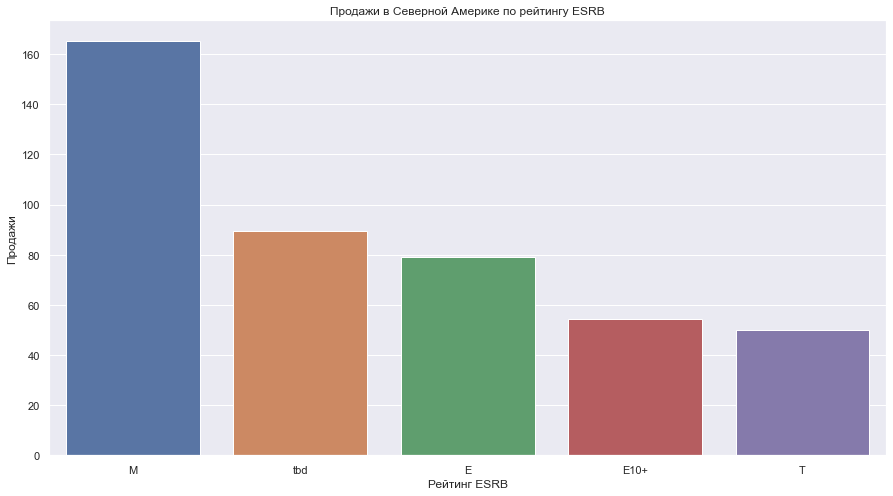

In [39]:
na_rating_top = (
    actual_data
    .pivot_table(index=['rating'], values='na_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='na_sales', ascending=False)
)

sns.barplot(y='na_sales',
            x='rating', 
            data = na_rating_top
           )
plt.title('Продажи в Северной Америке по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи') 
plt.show();

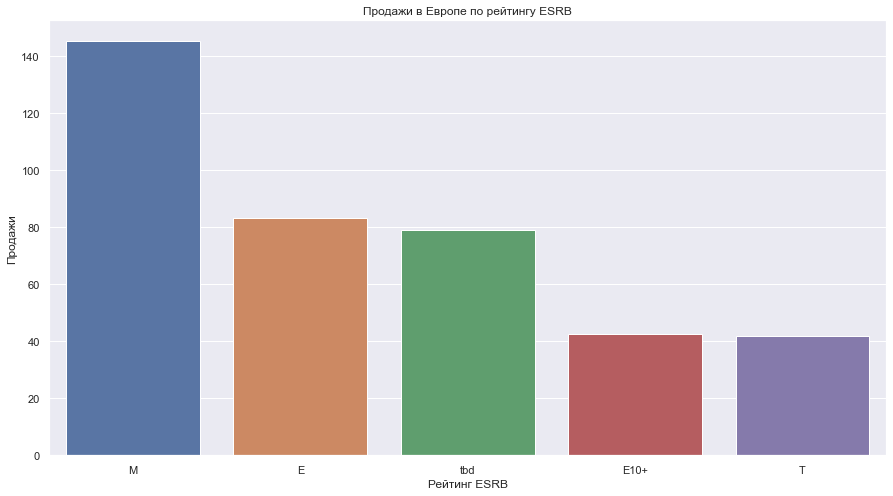

In [40]:
eu_rating_top = (
    actual_data
    .pivot_table(index=['rating'], values='eu_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='eu_sales', ascending=False)
)

sns.barplot(y='eu_sales',
            x='rating',
            data = eu_rating_top
           )
plt.title('Продажи в Европе по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи') 
plt.show();

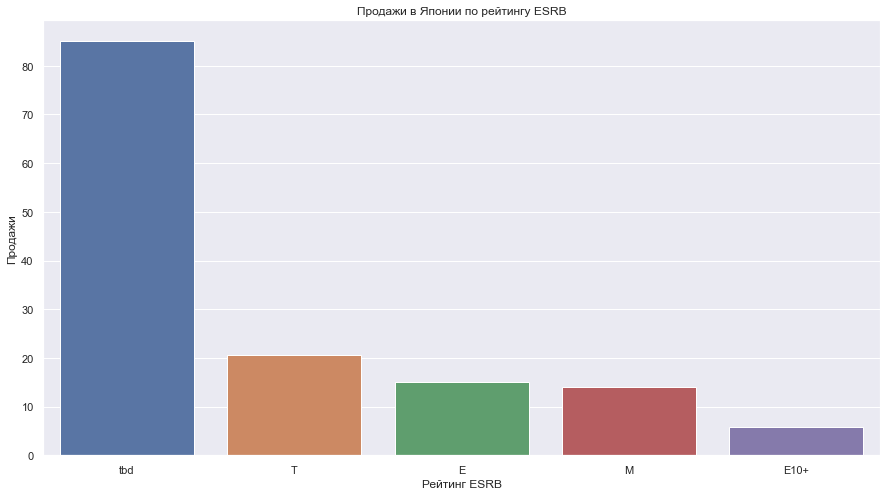

In [41]:
jp_rating_top = (
    actual_data
    .pivot_table(index=['rating'], values='jp_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='jp_sales', ascending=False)
)

sns.barplot(y='jp_sales', 
            x='rating', 
            data = jp_rating_top
           )
plt.title('Продажи в Японии по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи') 
plt.show();

In [42]:
tbd_rating = (
    actual_data
    .query('rating == "tbd"')
    .pivot_table(index='year_of_release', values='rating', aggfunc='count')
    .reset_index()
    .rename(columns={'rating':'tbd'})
    .sort_values(by='tbd', ascending=False)
)
display(tbd_rating)

,year_of_release,tbd
2,2015,291
1,2014,236
0,2013,228
3,2016,222


В Европе и северной Америке любят играть во "взрослые" игры. А в Японии абсолютную популярность имеют игры без рейтинга (напомню, часть данных может отсутствовать по разным причинам, некоторые из игр без рейтинга его имеют, но он не был записан в наш датасет корректно), судя по количеству игр без рейтинга в разные годы, это не только новинки (которым рейтинг не успели присвоить).

# Проверка гипотез
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

### Нулевая гипотеза 1: 
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
### Альтернативная гипотеза 1:
Средний пользовательский ретинг платформы Xbox One выше 6.2.
### Альтернативная гипотеза 2:
Средний пользовательский ретинг платформы PC выше 6.2.

In [43]:
xbox_rating = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] > 0)]['user_score']
pc_rating = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] > 0)]['user_score']

alpha = 0.05

result_1 = st.ttest_ind(xbox_rating, pc_rating)

print(result_1.pvalue)

if result_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу 1")
else:
    print("Не отвергаем нулевую гипотезу 1") 

0.14012658403611647
Не отвергаем нулевую гипотезу 1


In [44]:
#Код ревьюера
alpha = 0.05

results = st.ttest_ind(
    games.query('year_of_release > 2013 & platform == "XOne" & user_score > 0')['user_score'], 
    games.query('year_of_release > 2013 & platform == "PC" & user_score > 0')['user_score'])

print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-value:  0.10450507919348415
Опровергнуть нулевую гипотезу нельзя


In [45]:
print('Средний рейтинг для Xbox: {:}'.format(xbox_rating.mean()))
print('Стандартное отклонение для Xbox: {:}'.format(np.std(xbox_rating)))

print('Средний рейтинг для PC: {:}'.format(pc_rating.mean()))
print('Стандартное отклонение для PC: {:}'.format(np.std(pc_rating)))

Средний рейтинг для Xbox: 6.521428571428572
Стандартное отклонение для Xbox: 1.377141546212499
Средний рейтинг для PC: 6.2696774193548395
Стандартное отклонение для PC: 1.7367516654820374


In [46]:
good_platform_rating = 6.2

In [47]:
result_2 = st.ttest_1samp(xbox_rating, good_platform_rating)

print(result_2.pvalue/2)

if (result_2.pvalue/2 < alpha) & (xbox_rating.mean() > good_platform_rating):
    print("Не отвергаем альтернативную гипотезу 1")
else:
    print("Отвергаем альтернативную гипотезу 1") 

0.0009863691480965367
Не отвергаем альтернативную гипотезу 1


In [48]:
result_3 = st.ttest_1samp(pc_rating, good_platform_rating)

print(result_3.pvalue/2)

if (result_3.pvalue/2 < alpha) & (pc_rating.mean() > good_platform_rating):
    print("Не отвергаем альтернативную гипотезу 2")
else:
    print("Отвергаем альтернативную гипотезу 2") 

0.309643448287386
Отвергаем альтернативную гипотезу 2


Нулевая гипотеза не подтвердилась, рейтинги у Xbox и PC различаются. В качестве альтернативной гипотезы предположим, что рейтинг должен быть больше 6.2 (к нему близок рейтинг компьютерных игр, интересно, перемахнет ли он через него с таким большим отклонением). Данная гипотеза показала, что ожидаемый ретинг для Xbox будет выше 6.2 ,а компьютерные игры не дотягивают до него.

### Нулевая гипотеза 2: 
Средние пользовательские рейтинги жанров Action и Sports разные.
### Альтернативная гипотеза 3:
Средний пользовательский ретинг платформы Action выше 6.
### Альтернативная гипотеза 4:
Средний пользовательский ретинг платформы Sports выше 6.

In [49]:
action_rating = actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] > 0)]['user_score']
sports_rating = actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] > 0)]['user_score']

alpha = 0.05

result_4 = st.ttest_ind(action_rating, sports_rating)

print(result_4.pvalue)

if result_4.pvalue < alpha:
    print("Отвергаем нулевую гипотезу 2")
else:
    print("Не отвергаем нулевую гипотезу 2") 

1.0517832389140023e-27
Отвергаем нулевую гипотезу 2


In [50]:
good_genre_rating = 6

In [51]:
print('Средний рейтинг для Action: {:}'.format(action_rating.mean()))
print('Стандартное отклонение для Action: {:}'.format(np.std(action_rating)))

print('Средний рейтинг для Sports: {:}'.format(sports_rating.mean()))
print('Стандартное отклонение для Sports: {:}'.format(np.std(sports_rating)))

Средний рейтинг для Action: 6.837532133676092
Стандартное отклонение для Action: 1.3284624265041283
Средний рейтинг для Sports: 5.238124999999999
Стандартное отклонение для Sports: 1.7778453207112817


In [52]:
result_5 = st.ttest_1samp(action_rating, good_genre_rating)

print(result_5.pvalue/2)

if (result_5.pvalue/2 < alpha) & (action_rating.mean() > good_genre_rating):
    print("Не отвергаем альтернативную гипотезу 3")
else:
    print("Отвергаем альтернативную гипотезу 3") 

2.398991725606687e-30
Не отвергаем альтернативную гипотезу 3


In [53]:
result_6 = st.ttest_1samp(sports_rating, good_genre_rating)

print(result_6.pvalue/2)

if (result_6.pvalue/2 < alpha) & (sports_rating.mean() > good_genre_rating):
    print("Не отвергаем альтернативную гипотезу 4")
else:
    print("Отвергаем альтернативную гипотезу 4") 

1.1733041144471015e-07
Отвергаем альтернативную гипотезу 4


Нулевая гипотеза не подтвердилась, рейтинги у Action и Sports игр различаются. В качестве альтернативной гипотезы предположим, что рейтинг должен быть больше 6 (средний рейтинг по выборке довольно сильно отличается, но и отклонение немаленькое, посмотрим, что даст сравнение с промежуточным значением). Данная гипотеза показала, что ожидаемый ретинг для Action будет выше 6 ,а спортивные игры не дотягивают до него.

### Пояснения
Статистическую значимость 0.05 я выбрал как наиболее популярную, небольшой разброс значений и низкая требовательность к точности сравнения позволяют выбирать менее жесткие рамки. Альтернативные гипотезы выбирались исходя из ценности результата. Рейтинг игр для Xbox и PC выше 6, но значение 6.2 мог показать более интересный результат. Не знаю, насколько уместно строить вольные альтернативные гипотезы без какого-то предполагаемого значения от менеджера или типа того.

# Выводы
Данные были неполными с большим количеством пропусков, это не дает четкой картины, но этого достаточно, чтобы делать предположения. 
- Игровые платформы не живут вечно (за исключением компьютеров, но тут скорее невозможность классифицировать компьютеры по каким-либо типам), их средняя продолжительность жизни- 7 лет. Многие из популярных раньше платформ нынче не используются.
- Игровая индустрия прошла пик своей популярности, продажи игр с каждым годом падают во всех регионах и на всех платформах.
- PlayStation 4 на данный момент самая популярная игровая приставка в Европе и Америке, Японские геймеры по-прежднему хранят верность Nintendo.
- В большинстве своём, игроки не согласны с мнением критиков, которые часто пишут хвалебные отзывы и без того продаваемым играм. А игроки, напротив, игнорируют продажи и ставят оценку независимо. Везде, кроме Японии, где фанаты серий игр играют в локальные игры и с критиками на одной волне.
- Самые активные игры чаще покупают, а самые медленные, вдумчивые не завоевали рынок (даже в Японии, хотя там лидирует RPG, а в остальном мире Action игры). Вместе с тем, игры с рейтингом "М"  самые ходовые (обычно, где экшн, там и сцены насилия, и прочие прелести "взрослого" рейтинга).
- Xbox и PC идут бок о бок, хотя и небольшими различиями в среднем рейтинге игроков.
- Action игры лидируют не только по продажам, но и по рейтингу, ближайший конкурент- Sports- отстает аж на полтора балла в среднем, хоть и со стандартным отклонением в те же полтора балла.

Рекомендации для магазина видеоигр:
- Сконцентрироваться на продажах игр для платформ PlayStation 4 и Xbox One.
- Сделать ставку на продажи игр жанров: Action, Shooting, Sport, Role-playing.